# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

##Business Context


The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

##Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:



1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
#Libraries for data manipulation
import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Library for statistical analysis
import scipy.stats as stats

%matplotlib inline

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the data
df = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/Project 2 - E-news Express/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.shape

(100, 6)

The Dataframe has 100 rows and 6 columns

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


The Dataframe has 6 columns showing each User ID, the experiment group each user was placed in, the landing page, time spent on the page, if the user converted or not and the language preferences of each user

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


The `user_id` and `time_spent_on_the_page` columns are numerical while `group`, `landing_page`, `converted` and `language_preferred` are categorical

There are no missing values in the dataframe

The memory usage is 4.8+ KB

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The average time spent on the page is about 5.38 minutes, the median time is 5.41 minutes

In [ ]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the data

In [ ]:
#checking for duplicates in user id
df["user_id"].nunique()

100

There are 100 unique User IDs meaning there are no duplicates in the data

### Univariate Analysis

###Observations on Time spent on the page

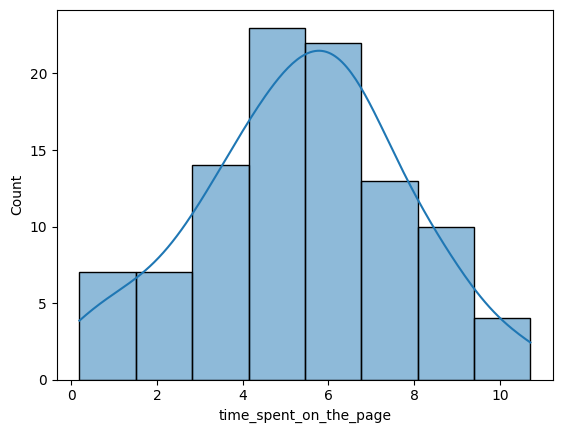

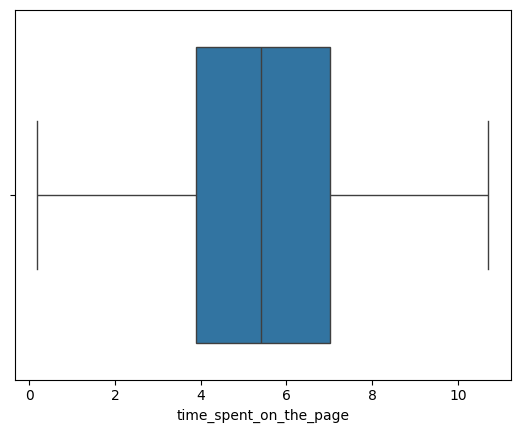

In [ ]:
sns.histplot(data=df, x="time_spent_on_the_page",kde = True)
plt.show()
sns.boxplot(data=df, x = "time_spent_on_the_page")
plt.show()


*   The distribution looks symmetrical
*   There are no outliers
*   The median time is about 5.5 minutes










###Observations on group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

<Axes: xlabel='group', ylabel='count'>

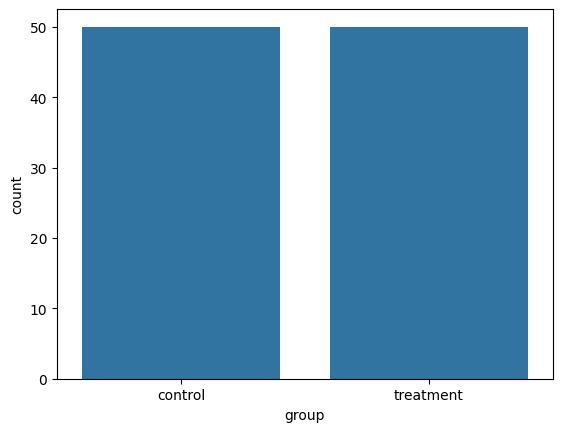

In [ ]:
sns.countplot(data=df, x = "group")

There are 50 observations each in the control and treatment group

###Observations on landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

<Axes: xlabel='landing_page', ylabel='count'>

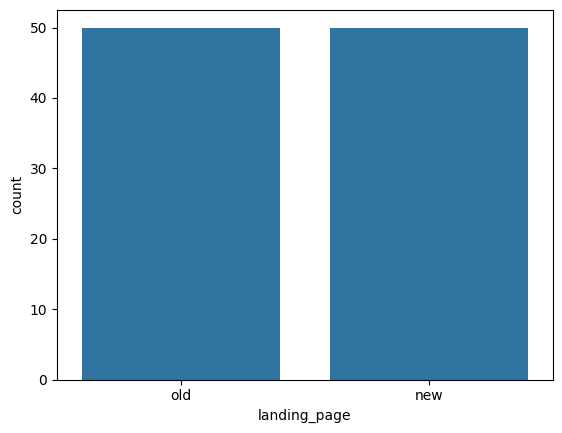

In [ ]:
sns.countplot(data=df, x = "landing_page")

There are 50 observations each for the old and new landing pages

###Observations on converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

<Axes: xlabel='converted', ylabel='count'>

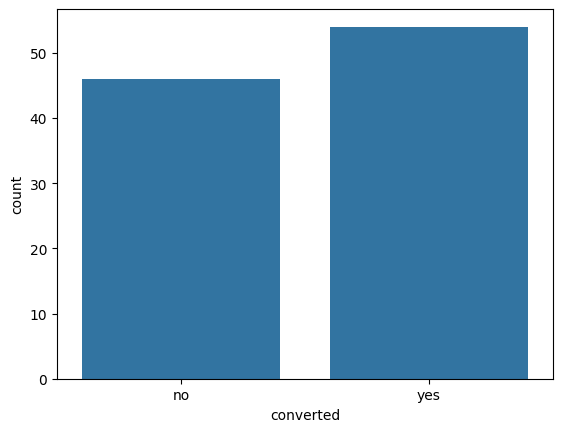

In [ ]:
sns.countplot(data=df, x = "converted")

54 of the users got converted to become a subscriber of the news portal while 46 did not

###Observations on Language preference

In [ ]:
df["language_preferred"].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

<Axes: xlabel='language_preferred', ylabel='count'>

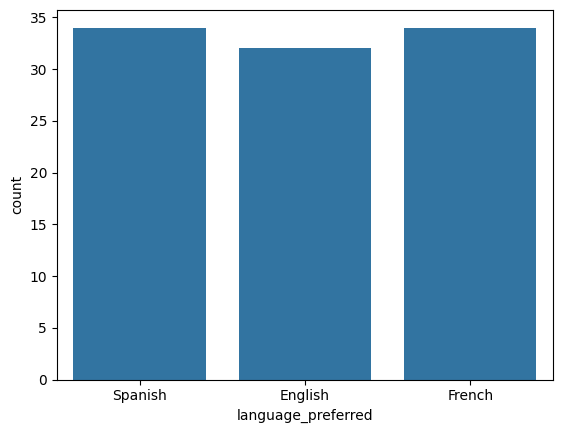

In [ ]:
sns.countplot(data=df, x = "language_preferred")

34 users preferred Spanish, 34 preferred French and 32 preferred English

### Bivariate Analysis

###Landing page vs time spent

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

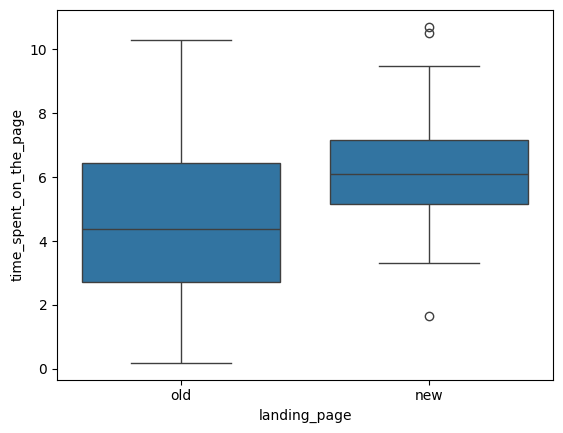

In [ ]:
sns.boxplot(data=df, x = "landing_page", y = "time_spent_on_the_page")

The median time spent on the new landing page is ~6 minutes with a few outliers while ~4.5 minutes is spent on the old landing page

###Converted vs Time spent

<Axes: xlabel='converted', ylabel='time_spent_on_the_page'>

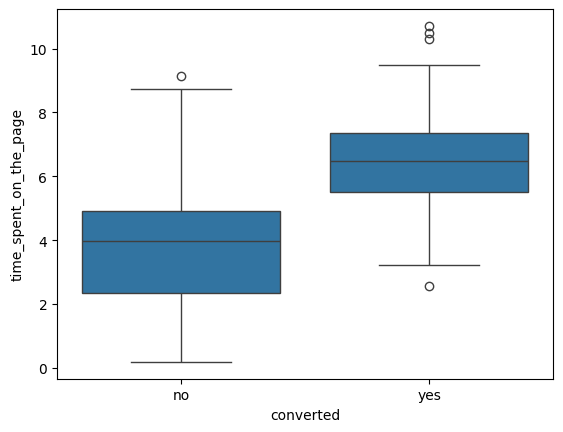

In [ ]:
sns.boxplot(data=df, x = "converted", y = "time_spent_on_the_page")

Users who converted to subscribers spent a median time of about 7 minutes while those who did not convert spent a median time of 4 minutes

###Language preferred vs Time spent

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

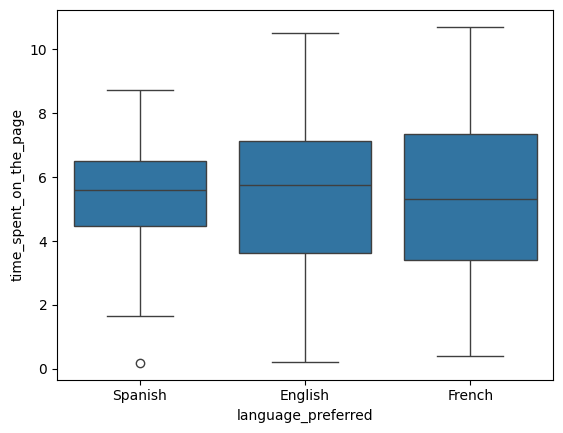

In [ ]:
sns.boxplot(data=df, x = "language_preferred", y = "time_spent_on_the_page")

A median time of about 5 minutes was spent on the news portal for the 3 languages

###Language preferred vs converted

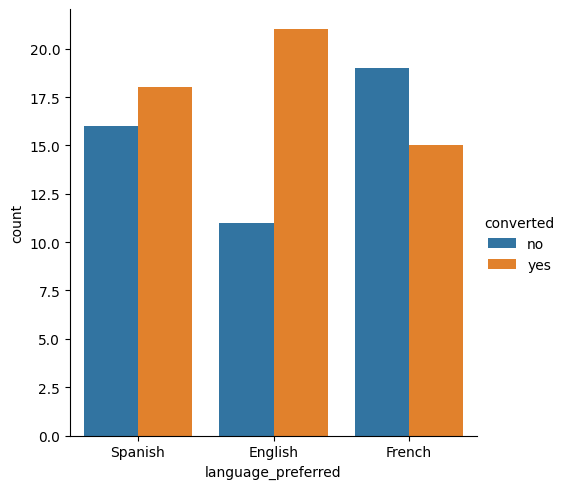

In [ ]:
sns.catplot(kind = "count", data=df, x = "language_preferred", hue = 'converted')

Among the 3 languages, English has the highest number of converted users and French has the highest number of non-converted users

###Landing page vs Converted

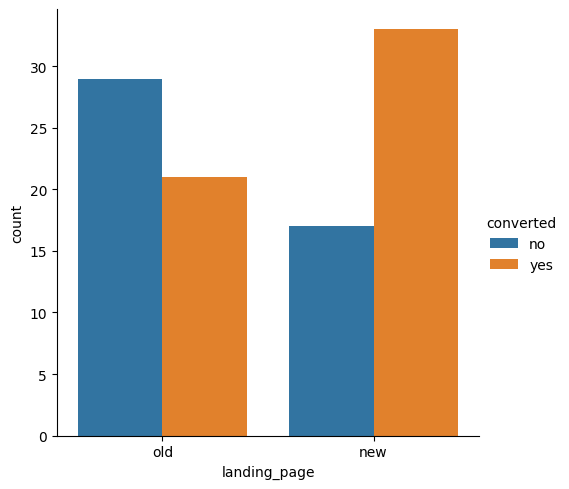

In [ ]:
sns.catplot(kind = "count", data=df, x = "landing_page", hue = 'converted')

The new landing page has more converted users and the old landing page has more non-converted users

###Landing page vs Language vs Converted

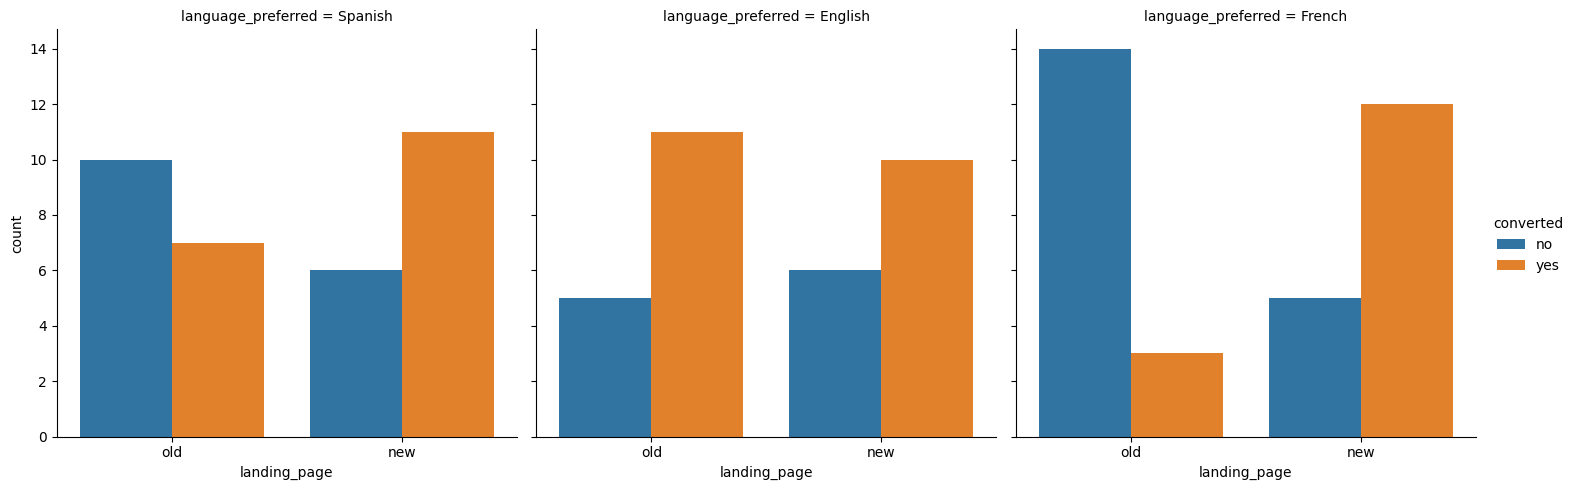

In [ ]:
sns.catplot(kind = "count", data=df, x = "landing_page", hue = 'converted', col = "language_preferred")

Among the 3 languages, there is a general trend of the new landing page converting more users into subscribers.
The old landing page has more non-converted users except for English, the old landing page converted even more users than the new one

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

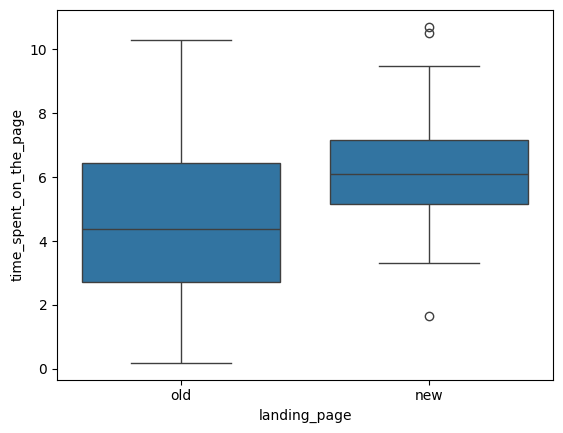

In [ ]:
sns.boxplot(data = df, x = "landing_page", y = "time_spent_on_the_page")

The median time spent on the new landing page
(~ 6 minutes) is more than the median time spent on the old landing page (~4.5 minutes)


### Step 1: Define the null and alternate hypotheses


Let $\mu_n$ and $\mu_o$ be the mean time spent on the new landing page and old landing page respectively
>$H_0:\mu_n<=\mu_o$

>$H_a:\mu_n>\mu_o$

### Step 2: Select Appropriate test

This is a one tailed test comparing sample means from two independent populations and the population standard deviation is unknown. The appropriate test would be the **two sample independent t-test**.

### Step 3: Decide the significance level

The significance level is 0.05

### Step 4: Collect and prepare data

In [ ]:
#storing the time spent with respect to the landing page in separate variables
new_time_spent = df[df["landing_page"] == "new"]["time_spent_on_the_page"]
old_time_spent = df[df["landing_page"] == "old"]["time_spent_on_the_page"]


In [ ]:
#testing for equality of the standard deviations
print("The standard deviation of the time spent on the new landing page is: ", round(new_time_spent.std(), 2))
print("The standard deviation of the time spent on the old landing page is: ", round(old_time_spent.std(), 2))

The standard deviation of the time spent on the new landing page is:  1.82
The standard deviation of the time spent on the old landing page is:  2.58


The standard deviations are unequal

### Step 5: Calculate the p-value

In [ ]:
#importing the t-test function
from scipy.stats import ttest_ind

#calculating the p-value
test_stat, p_value = ttest_ind(new_time_spent, old_time_spent, equal_var = False, alternative = "greater")
print("p-value =", p_value)

p-value = 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value > 0.05:
  print("The p_value", p_value,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", p_value,"is less than the level of significance therefore we reject the null hypothesis")


The p_value 0.0001392381225166549 is less than the level of significance therefore we reject the null hypothesis


### Step 7:  Draw inference

As the p-value(~0.00013) is less than the level of significance, we can reject the null hypothesis. Therefore, we have enough statistical evidence to say more time is spent on the new landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###Visual Analysis

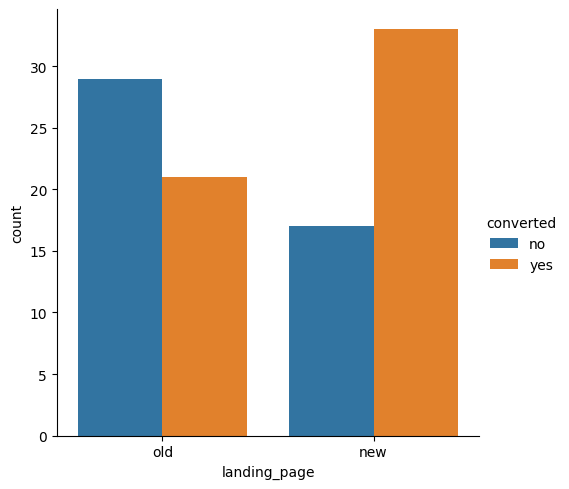

In [ ]:
sns.catplot(kind = "count", data=df, x = "landing_page", hue = 'converted')

According to the plot, the new landing page has a larger number of converted users

###Defining the null and alternative hypothesis

Let $p_1,p_2$ be the proportions of converted users in the new landing page and old landing page respectively

>$H_0:p_1 <=p_2$

>$H_a:p_1 > p_2$


###Selecting the appropriate test

This is a one-tailed test comparing the sample proportions from two independent populations. The appropriate test would be the **two proportions z-test**

###Significance level

The significance level is 0.05

###Preparing the data

In [ ]:
#number of new landing page visits
num_new_page = df["landing_page"].value_counts()["new"]

#number of old landing page visits
num_old_page = df["landing_page"].value_counts()["old"]

print("The number of visits on the new and old landing pages are", num_new_page,"and", num_old_page, "respectively")

#number of users converted by the new page
new_page_converts = df[df['landing_page'] == 'new'].converted.value_counts()["yes"]

#number of users converted by the old page
old_page_converts = df[df['landing_page'] == 'old'].converted.value_counts()["yes"]

print("The number of users converted by the new landing page and the old landing page are", new_page_converts, "and",old_page_converts, "respectively" )


The number of visits on the new and old landing pages are 50 and 50 respectively
The number of users converted by the new landing page and the old landing page are 33 and 21 respectively


In [ ]:
print("The proportion of users converted by the new landing page and old landing page are", round(33/50, 2),"and", round(21/50, 2), "respectively")

The proportion of users converted by the new landing page and old landing page are 0.66 and 0.42 respectively


###Testing if the Z-test assumptions are satisfied


*   It is binomially distributed. The users either convert or they don't
*   The sample is collected randomly
*   The binomial distribution can be approximated to a normal distribution and as shown below np and n(1-p) are greater than or equal to 10.

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

###Calculating the p-value

In [ ]:
#importing the z-test function
from statsmodels.stats.proportion import proportions_ztest

#calculating p-value
stat, pval = proportions_ztest([new_page_converts, old_page_converts], [num_new_page, num_old_page], alternative = "larger")
pval

0.008026308204056278

###Compare p-value with 𝜶

In [ ]:
if pval > 0.05:
  print("The p_value", pval,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", pval,"is less than the level of significance therefore we reject the null hypothesis")


The p_value 0.008026308204056278 is less than the level of significance therefore we reject the null hypothesis


###Draw inference

As the p-value(~0.008) is less than the level of significance, we can reject the null hypothesis. Therefore, we have enough statistical evidence to say the conversion rate of the new page is greater than the conversion rate of the old page

## 3. Is the conversion and preferred language are independent or related?

###Visual Analysis

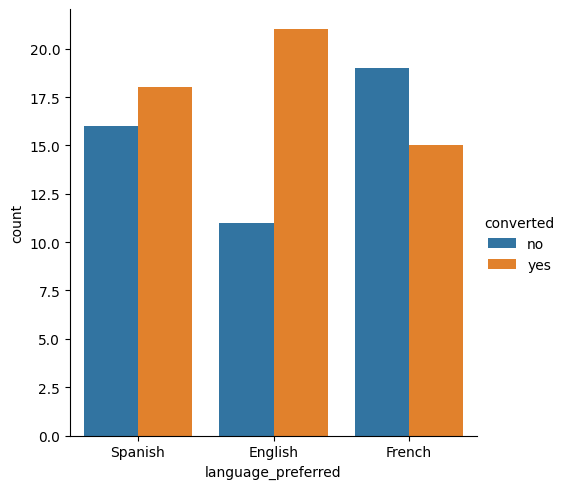

In [ ]:
sns.catplot(kind = "count", data=df, x = "language_preferred", hue = 'converted')

###Define the null and alternative hypotheses

>$H_0:$ Conversion is independent of the language



>$H_a:$ Conversion depends on the language

###Select the appropriate test

This is a test of independence between two categorical variables, the appropriate test would be the **Chi-square test for independence**

###Decide the significance level

Significance level is 0.05

###Collect and prepare data

In [ ]:
#creating a contingency table to perform the test
contingency_table = pd.crosstab(df.converted, df.language_preferred)
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


###Calculate p-value

In [ ]:
#Import the chi square function
from scipy.stats import chi2_contingency

#calculate p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

0.21298887487543447

###Compare the p-value with 𝛂

In [ ]:
if p_value > 0.05:
  print("The p_value", p_value,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", p_value,"is less than the level of significance therefore we reject the null hypothesis")


The p_value 0.21298887487543447 is greater than the level of significance therefore we fail to reject the null hypothesis


###Draw inference

As the p-value(~0.21) is greater than the level of significance, we fail to reject the null hypothesis. Therefore, we have enough statistical evidence to say the conversion is independent of the language

## 4. Is the time spent on the new page same for the different language users?

###Visual Analysis

In [ ]:
#storing info of the new landing page in a new dataframe
df_new_page = df[df["landing_page"] == "new"]

In [ ]:
#calculating mean of time spent on the new page in each language
df_new_page.groupby("language_preferred")["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

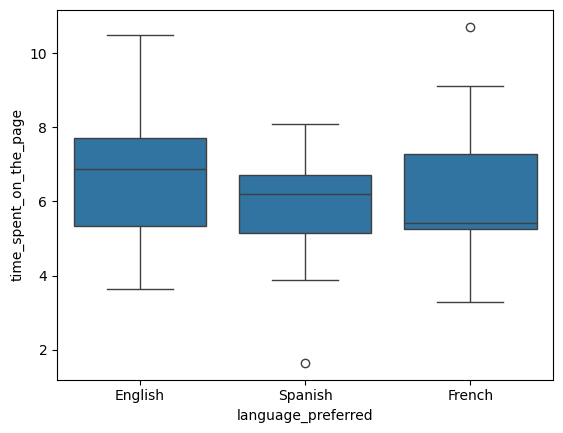

In [ ]:
sns.boxplot(data = df_new_page, x = "language_preferred", y = "time_spent_on_the_page")

###Define the null and alternate hypotheses


Let $\mu_E, \mu_S, \mu_F$ be the means of time spent on the new page for English, Spanish and French respectively.


>$H_0: \mu_E = \mu_S = \mu_F$


>$H_a: $ At least time spent for one of the languages is different from the rest.


###Select the appropriate test

This is a test to compare 3 sample means, the appropriate test would be the **one way ANOVA test**

####Testing for normality (Shapiro-Wilk's test)

>$H_0:$ The time spent follow a normal distribution



>$H_a:$ The time spent do not not follow a normal distribution

In [ ]:
#testing for assumption of normality
w, p_value = stats.shapiro(df_new_page["time_spent_on_the_page"])
p_value

0.8040016293525696

The p-value is larger than the level of significance (0.05), so we fail to reject the hypothesis that time spent follows a normal distribution

####Testing for equality of variance (Levene's test)

>$H_0$: All the population variances are equal


>$H_a$: At least one variance is different from the rest

In [ ]:
#testing for assumption of equality of variances
statistic, p_value = stats.levene(df_new_page[df_new_page["language_preferred"] == "English"]["time_spent_on_the_page"],
                                  df_new_page[df_new_page["language_preferred"] == "Spanish"]["time_spent_on_the_page"],
                                  df_new_page[df_new_page["language_preferred"] == "French"]["time_spent_on_the_page"])
p_value

0.46711357711340173

The p_value is larger than the level of significance, therefore, we fail to reject the null hypothesis of homogeneity of variances

The assumptions of normality and equality of variance are satisfied

###Decide the significance level

Significance level is 0.05

###Collect and prepare the data

In [ ]:
#storing the time spent with respect to each language in separate variables
time_spent_English = df_new_page[df_new_page["language_preferred"] == "English"]["time_spent_on_the_page"]
time_spent_Spanish = df_new_page[df_new_page["language_preferred"] == "Spanish"]["time_spent_on_the_page"]
time_spent_French = df_new_page[df_new_page["language_preferred"] == "French"]["time_spent_on_the_page"]


###Calculate the p-value

In [ ]:
#importing the required function
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_Spanish, time_spent_French)
p_value

0.43204138694325955

###Compare the p-value with 𝜶

In [ ]:
if p_value > 0.05:
  print("The p_value", p_value,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", p_value,"is less than the level of significance therefore we reject the null hypothesis")


The p_value 0.43204138694325955 is greater than the level of significance therefore we fail to reject the null hypothesis


###Draw Inference

As the p-value(~0.43) is greater than the level of significance, we fail to reject the null hypothesis. Therefore, we have enough statistical evidence to say there is no significant difference in the time spent on the new page for the different language users

## Conclusion and Business Recommendations

OBSERVATIONS
*   Time spent on the landing page of the news portal ranges from ~11 seconds to ~10 minutes
*   Average time spent is about 5 minutes
*   The English version had the highest number of converted users
*   Interestingly, the old landing page in English had a slightly higher conversion rate than the new landing page





From the data, we have enough statistical evidence for the following:


*   More time is spent on the new landing page
*   The new landing page has a greater conversion rate
*   Conversion of the users is independent of the language preferred
*   There is no significant difference in the time spent on the new landing page for the different languages

In conclusion, the new landing page is more effective in gathering new subscribers for the news portal. E-news Express can publish the new landing page and further monitor its conversion rate.

___